# Visualizations



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
sns.set(color_codes=True)
sns.set(style="darkgrid")

In [ ]:
import matplotlib.pyplot as plt


# Import necessary libraries
import folium

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Ingest CSV Files for Los Angeles
los_angeles_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/704 Project/Datasets/USA/Los Angeles/los_Angeles_P1.csv')
los_angeles_data

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20240607021552,2024-06-07,city scrape,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, ne...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,521,...,4.00,5.00,4.00,NaN,f,1,1,0,0,0.01
1,2708,https://www.airbnb.com/rooms/2708,20240607021552,2024-06-08,city scrape,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,...,4.98,4.95,4.88,NaN,t,2,0,2,0,0.34
2,24349,https://www.airbnb.com/rooms/24349,20240607021552,2024-06-07,city scrape,"The Wolford House, a Mid Century Hilltop Jewel",Gather for sun-dappled alfresco lunches at a s...,"Tucked away atop Mount Washington, the propert...",https://a0.muscache.com/pictures/819ea537-72c2...,98565,...,5.00,4.98,4.92,HSR21-002783,f,1,1,0,0,1.62
3,2732,https://www.airbnb.com/rooms/2732,20240607021552,2024-06-08,city scrape,Zen Life at the Beach,An oasis of tranquility awaits you.,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,...,4.48,4.91,4.22,228269,f,2,1,1,0,0.15
4,25670,https://www.airbnb.com/rooms/25670,20240607021552,2024-06-08,city scrape,Charming accommodations in Westwood/West LA,"Central, convenient, cozy 3room accommodations...","quiet, residential, safe, easy frwy access( (p...",https://a0.muscache.com/pictures/17748938/d583...,107370,...,4.95,4.84,4.37,Exempt - This listing is a bed and breakfast,f,1,1,0,0,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44679,1172800467497587416,https://www.airbnb.com/rooms/1172800467497587416,20240607021552,2024-06-07,city scrape,Quiet Echo Park Bungalow+PATIO,"Sweet semi - remodeled home, <br />your own p...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,409985549,...,NaN,NaN,NaN,NaN,f,23,23,0,0,NaN
44680,1172803234998373195,https://www.airbnb.com/rooms/1172803234998373195,20240607021552,2024-06-08,city scrape,Modern Villa On Sunset Plaza,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,347851048,...,NaN,NaN,NaN,HSR23-002920,t,22,22,0,0,NaN
44681,1172803419506137148,https://www.airbnb.com/rooms/1172803419506137148,20240607021552,2024-06-08,city scrape,stunning vila in central LA,Furniture has been changed and new photos on t...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,535105254,...,NaN,NaN,NaN,HSR23-001695,t,12,12,0,0,NaN
44682,1172819961651225254,https://www.airbnb.com/rooms/1172819961651225254,20240607021552,2024-06-08,city scrape,Hollywood Dreamscape,Experience Hollywood like never before from ou...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,425585404,...,NaN,NaN,NaN,HSR24-000035,t,3,3,0,0,NaN


In [ ]:
# Drop columns with more than 30% NaN values
threshold = 0.30
los_angeles_data = los_angeles_data.dropna(thresh=len(los_angeles_data) * (1 - threshold), axis=1)

# Print the updated DataFrame
los_angeles_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', '

In [ ]:
# Calculate the number of rows with at least one NaN value
rows_with_nan = los_angeles_data.isnull().any(axis=1).sum()

print(f"Number of rows with at least one NaN value: {rows_with_nan}")

Number of rows with at least one NaN value: 29248


In [ ]:
# Convert price to float
los_angeles_data['price'] = los_angeles_data['price'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)

In [ ]:
los_angeles_data.dropna(inplace=True)
los_angeles_data.reset_index(drop=True, inplace=True)
los_angeles_data

,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2708,https://www.airbnb.com/rooms/2708,20240607021552,2024-06-08,city scrape,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,...,5.00,4.98,4.95,4.88,t,2,0,2,0,0.34
1,24349,https://www.airbnb.com/rooms/24349,20240607021552,2024-06-07,city scrape,"The Wolford House, a Mid Century Hilltop Jewel",Gather for sun-dappled alfresco lunches at a s...,https://a0.muscache.com/pictures/819ea537-72c2...,98565,https://www.airbnb.com/users/show/98565,...,4.98,5.00,4.98,4.92,f,1,1,0,0,1.62
2,2732,https://www.airbnb.com/rooms/2732,20240607021552,2024-06-08,city scrape,Zen Life at the Beach,An oasis of tranquility awaits you.,https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,...,4.39,4.48,4.91,4.22,f,2,1,1,0,0.15
3,30470,https://www.airbnb.com/rooms/30470,20240607021552,2024-06-08,city scrape,"Guest suite in a craftsman house, walk to studios","5-10 min walk to 3 major studios: Amazon, Appl...",https://a0.muscache.com/pictures/miso/Hosting-...,105868,https://www.airbnb.com/users/show/105868,...,4.97,4.94,4.97,4.72,f,1,0,1,0,1.25
4,6931,https://www.airbnb.com/rooms/6931,20240607021552,2024-06-08,city scrape,"RUN Runyon, Beau Furn Rms w/ Stunning Terrace ...",Run Runyon Canyon and Views<br /><br />Gym & S...,https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,...,4.90,4.90,4.70,4.73,t,2,0,2,0,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15431,1166841923468916985,https://www.airbnb.com/rooms/1166841923468916985,20240607021552,2024-06-08,city scrape,"King Bed Studio, Pool, Gym w/ Free Gated Parking",Modern studio in Hollywood next to W Hotel Hol...,https://a0.muscache.com/pictures/miso/Hosting-...,30602955,https://www.airbnb.com/users/show/30602955,...,5.00,5.00,5.00,5.00,f,11,11,0,0,2.00
15432,1167397126509913380,https://www.airbnb.com/rooms/1167397126509913380,20240607021552,2024-06-07,city scrape,Luxury Beach Getaway,Make some memories at this unique and family-f...,https://a0.muscache.com/pictures/hosting/Hosti...,176922215,https://www.airbnb.com/users/show/176922215,...,4.00,4.00,4.00,4.00,t,3,3,0,0,1.00
15433,1168317334443444484,https://www.airbnb.com/rooms/1168317334443444484,20240607021552,2024-06-07,city scrape,Quiet Apartment in Downtown,Located in a quiet part of Downtown LA.,https://a0.muscache.com/pictures/hosting/Hosti...,501069118,https://www.airbnb.com/users/show/501069118,...,5.00,5.00,5.00,5.00,t,4,4,0,0,1.00
15434,1167742380430977953,https://www.airbnb.com/rooms/1167742380430977953,20240607021552,2024-06-07,city scrape,Yeehaw Suite,Welcome to the yeehaw suite. A combination of ...,https://a0.muscache.com/pictures/hosting/Hosti...,316845116,https://www.airbnb.com/users/show/316845116,...,5.00,5.00,5.00,5.00,t,4,4,0,0,3.00


In [ ]:
not_useful_columns = [
    'id','source','name','description',
    'host_id','host_name','host_url','host_thumbnail_url','host_picture_url',
    'scrape_id', 'last_scraped', 'listing_url', 'picture_url',
    'calendar_last_scraped','host_location','host_since','first_review','last_review']

In [ ]:
categorical_variables_with_more_categories = ['host_neighbourhood','amenities',
                                                'host_verifications',
                                                'bathrooms_text','property_type']

In [ ]:
los_angeles_data = los_angeles_data.drop(columns=not_useful_columns, errors='ignore')
los_angeles_data

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,within an hour,100%,100%,t,Hollywood,2.0,3.0,"['email', 'phone']",t,t,...,5.00,4.98,4.95,4.88,t,2,0,2,0,0.34
1,within an hour,100%,67%,f,Mount Washington,1.0,1.0,"['email', 'phone']",t,f,...,4.98,5.00,4.98,4.92,f,1,1,0,0,1.62
2,within an hour,100%,50%,f,Santa Monica,2.0,2.0,"['email', 'phone']",t,t,...,4.39,4.48,4.91,4.22,f,2,1,1,0,0.15
3,within a few hours,100%,100%,t,Culver City,1.0,4.0,"['email', 'phone']",t,t,...,4.97,4.94,4.97,4.72,f,1,0,1,0,1.25
4,within an hour,100%,100%,t,Hollywood,2.0,3.0,"['email', 'phone']",t,t,...,4.90,4.90,4.70,4.73,t,2,0,2,0,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15431,within an hour,100%,96%,t,Central LA,12.0,23.0,"['email', 'phone']",t,t,...,5.00,5.00,5.00,5.00,f,11,11,0,0,2.00
15432,within an hour,100%,99%,f,East Village,3.0,4.0,"['email', 'phone']",t,t,...,4.00,4.00,4.00,4.00,t,3,3,0,0,1.00
15433,within an hour,100%,100%,f,Downtown Los Angeles,4.0,4.0,"['email', 'phone']",t,t,...,5.00,5.00,5.00,5.00,t,4,4,0,0,1.00
15434,within an hour,100%,100%,t,Tropico,4.0,5.0,['phone'],t,t,...,5.00,5.00,5.00,5.00,t,4,4,0,0,3.00


## Filtering Top 30 neighbourhoods


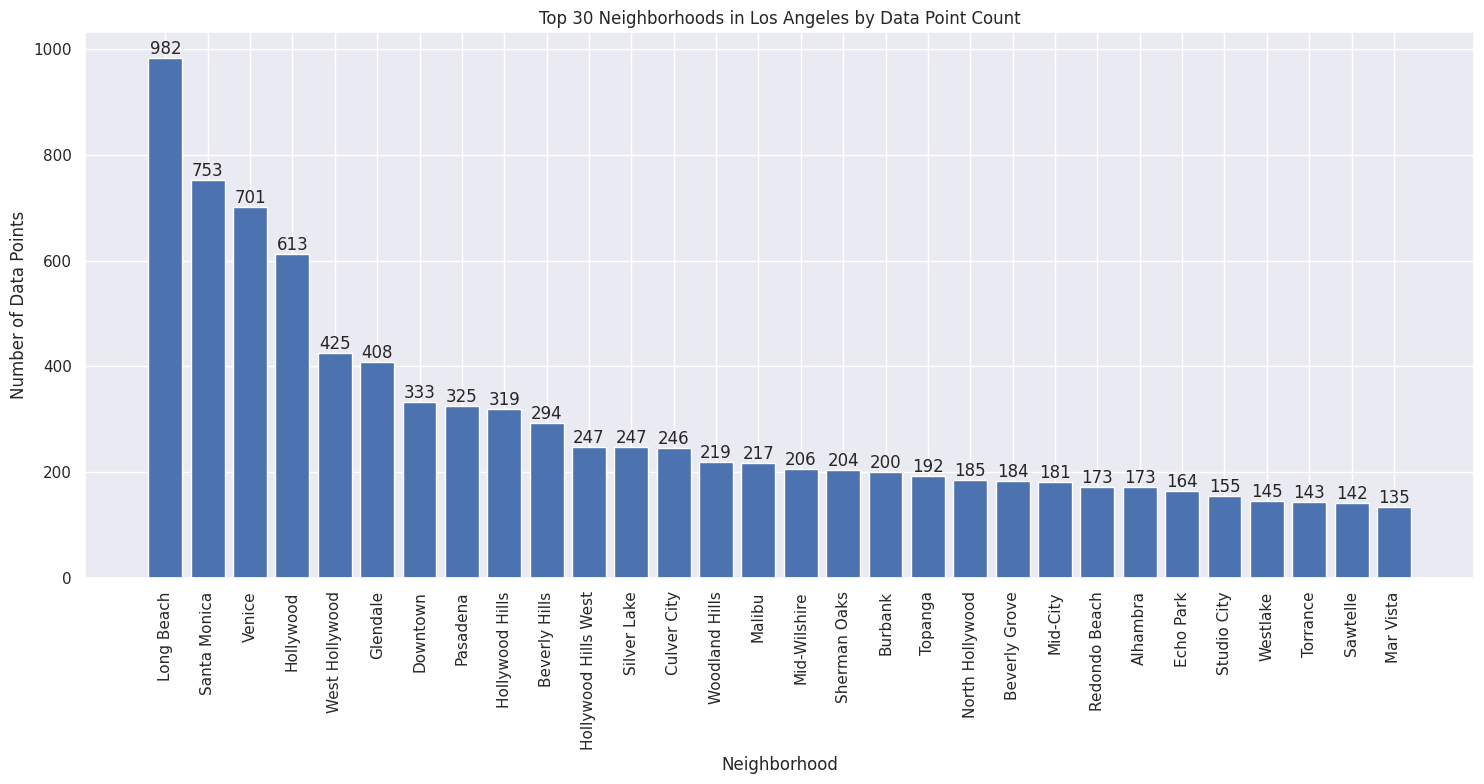

In [ ]:
# Capturing top 30 neighbourhoods
import matplotlib.pyplot as plt

# Count occurrences of each neighborhood
neighborhood_counts = los_angeles_data['neighbourhood_cleansed'].value_counts()

# Get the top 30 neighborhoods
top_30_neighborhoods = neighborhood_counts.head(30)

# Create the bar plot
plt.figure(figsize=(15, 8))  # Adjust figure size for better readability
bars = plt.bar(top_30_neighborhoods.index, top_30_neighborhoods.values)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Data Points")
plt.title("Top 30 Neighborhoods in Los Angeles by Data Point Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add data point counts on top of each bar
for bar, count in zip(bars, top_30_neighborhoods.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# prompt: use the above graph and do some changes give me the count of datapoints on the bar and calculate no of data points we have till top 25 neighbourhoods and calculate the remaining in another variable and print both values for  los_angeles_data

# Calculate the total number of data points
total_data_points = len(los_angeles_data)

# Calculate the number of data points in the top 25 neighbourhoods
top_25_neighbourhoods = neighborhood_counts.head(25)
data_points_top_25 = top_25_neighbourhoods.sum()

# Calculate the number of data points in the remaining neighbourhoods
remaining_data_points = total_data_points - data_points_top_25

# Print the results
print(f"Number of data points in the top 25 neighbourhoods: {data_points_top_25}")
print(f"Number of data points in the remaining neighbourhoods: {remaining_data_points}")
print(f"Number of data points in the entire dataset: {total_data_points}")
print(f"Number of neighbourhoods in the entire dataset: {len(los_angeles_data['neighbourhood_cleansed'].unique())}")

Number of data points in the top 25 neighbourhoods: 8191
Number of data points in the remaining neighbourhoods: 7245
Number of data points in the entire dataset: 15436
Number of neighbourhoods in the entire dataset: 245


In [ ]:
top_25_neighbourhoods

,count
neighbourhood_cleansed,
Long Beach,982
Santa Monica,753
Venice,701
Hollywood,613
West Hollywood,425
Glendale,408
Downtown,333
Pasadena,325
Hollywood Hills,319


In [ ]:
top_neighborhoods = los_angeles_data['neighbourhood_cleansed'].value_counts().head(25).index

top_neighborhoods_data = los_angeles_data[los_angeles_data['neighbourhood_cleansed'].isin(top_neighborhoods)]
top_neighborhoods_data['neighbourhood_cleansed'].unique()

array(['Hollywood', 'Santa Monica', 'Culver City', 'Venice',
       'Silver Lake', 'Redondo Beach', 'Hollywood Hills', 'Mid-City',
       'Pasadena', 'West Hollywood', 'Mid-Wilshire', 'Woodland Hills',
       'North Hollywood', 'Topanga', 'Beverly Hills', 'Echo Park',
       'Hollywood Hills West', 'Long Beach', 'Burbank', 'Malibu',
       'Alhambra', 'Sherman Oaks', 'Downtown', 'Beverly Grove',
       'Glendale'], dtype=object)

## Price vs Neighbourhood analysis using visualizations


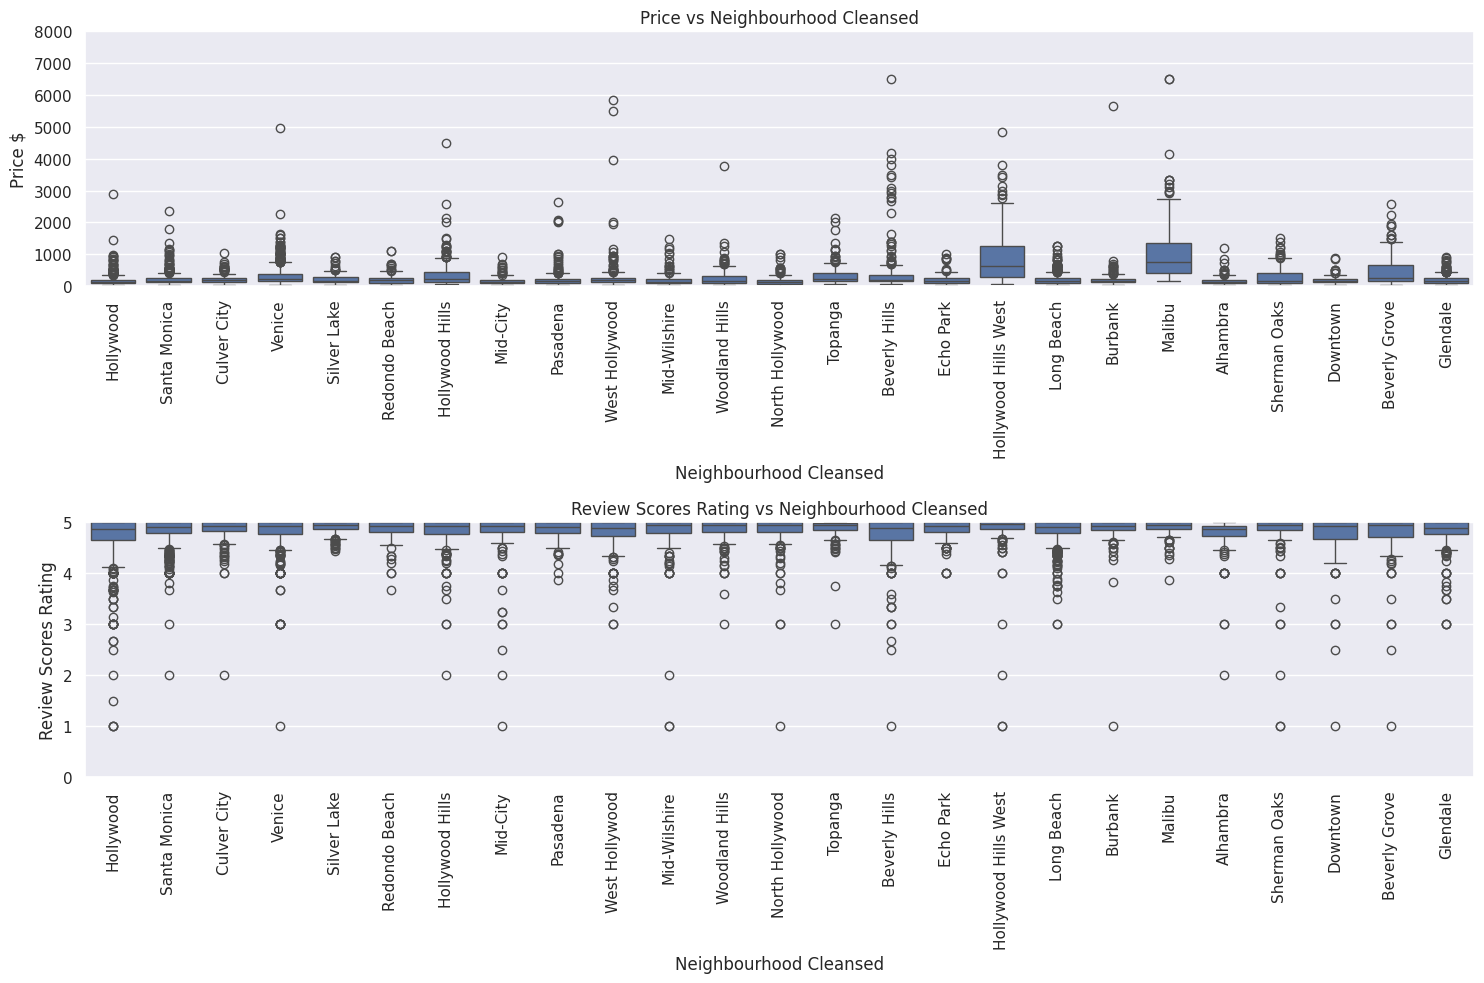

In [ ]:

plt.figure(figsize=(15, 10)) # Increase figure size for subplots

# First subplot: Price vs Neighbourhood Cleansed
plt.subplot(2, 1, 1)
sns.boxplot(x="neighbourhood_cleansed", y="price", data=top_neighborhoods_data)
plt.xticks(rotation=90)
plt.title('Price vs Neighbourhood Cleansed')
plt.xlabel('Neighbourhood Cleansed')
plt.ylabel('Price $')
plt.ylim(0, 8000)

# Second subplot: review_scores_rating vs neighbourhood_cleansed
plt.subplot(2, 1, 2)
sns.boxplot(x="neighbourhood_cleansed", y="review_scores_rating", data=top_neighborhoods_data)
plt.xticks(rotation=90)
plt.title('Review Scores Rating vs Neighbourhood Cleansed')
plt.xlabel('Neighbourhood Cleansed')
plt.ylabel('Review Scores Rating')
plt.ylim(0, 5) # Assuming review scores are out of 10


plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

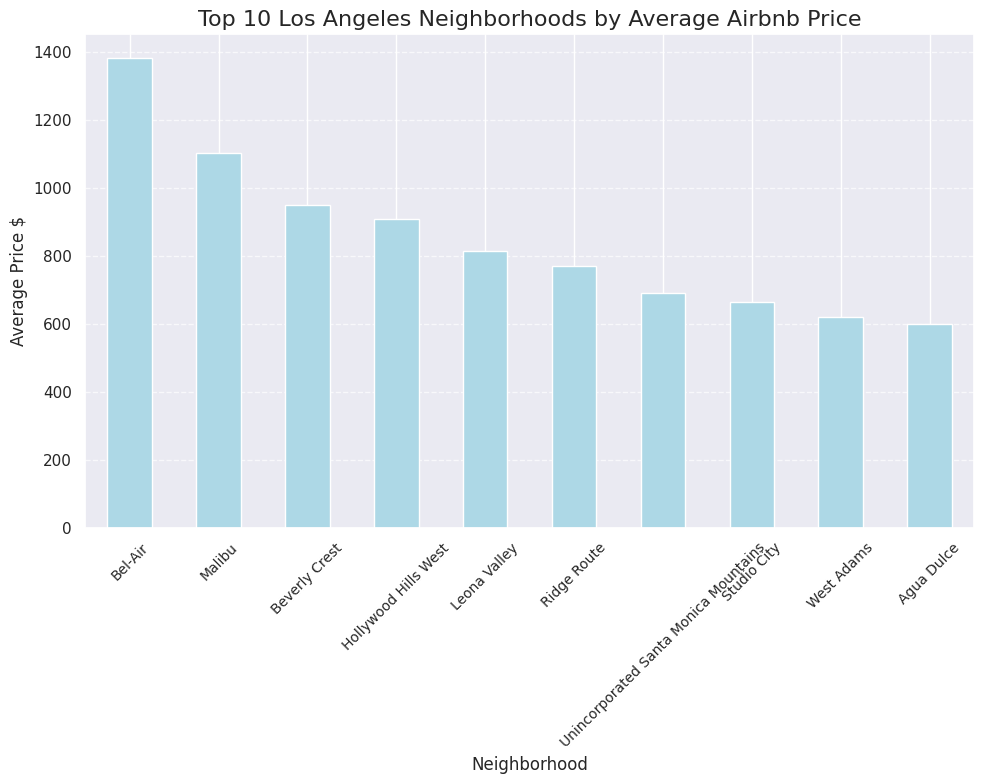

In [ ]:
# Grouping the data by neighborhood and calculating the mean price
top_neighborhood_prices = los_angeles_data.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(10)

# Plotting the average prices per neighborhood
plt.figure(figsize=(10, 8))
top_neighborhood_prices.plot.bar(color='lightblue')
plt.title('Top 10 Los Angeles Neighborhoods by Average Airbnb Price', fontsize=16)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Average Price $', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate mean latitude, longitude and price for each neighborhood
location_data = los_angeles_data.groupby('neighbourhood_cleansed').agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'price': 'mean'
}).dropna()  # Removing entries without price data

# Create a map centered around Los Angeles
la_map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Add circles to the map
for index, row in location_data.iterrows():
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=row['price'],  # Scale radius to make it visible, adjust scale as necessary
        color='blue',
        fill=True,
        fill_opacity=0.7,
        tooltip=f"{index}: ${row['price']:.2f}"
    ).add_to(la_map)

la_map

## Visualizing price categories among top 25 neighbourhoods

In [ ]:
def categorize_price(price):
    if 0 <= price < 100:
        return 'Economy'
    elif 100 <= price < 225:
        return 'Premium'
    else:
        return 'Luxury'

top_neighborhoods_data['price_range'] = top_neighborhoods_data['price'].apply(categorize_price)
top_neighborhoods_data['price_range']

,price_range
0,Economy
2,Premium
3,Premium
4,Premium
5,Premium
...,...
15429,Premium
15430,Premium
15431,Premium
15432,Premium


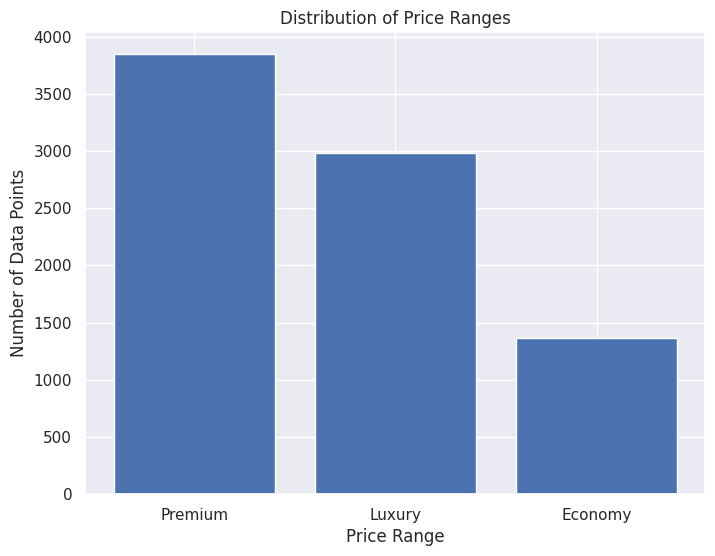

In [ ]:
# prompt: create me a plot having price range as x and having the number of datapoints having these price range in y by using los_angeles_data

import matplotlib.pyplot as plt

# Assuming los_angeles_data is already loaded and processed as in your provided code

# Count occurrences of each price range
price_counts = top_neighborhoods_data['price_range'].value_counts()

# Create the plot
plt.figure(figsize=(8, 6))
plt.bar(price_counts.index, price_counts.values)
plt.xlabel("Price Range")
plt.ylabel("Number of Data Points")
plt.title("Distribution of Price Ranges")
plt.show()